In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

In [ ]:
!kaggle datasets download -d warcoder/visual-product-recognition

Dataset URL: https://www.kaggle.com/datasets/warcoder/visual-product-recognition
License(s): unknown
100% 18.3G/18.3G [13:39<00:00, 28.9MB/s]
100% 18.3G/18.3G [13:39<00:00, 24.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/visual-product-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, models
import pandas as pd
from PIL import Image
import numpy as np
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-39-4ac417f9812f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_classes.index, y=top_5_classes.values, palette="viridis")


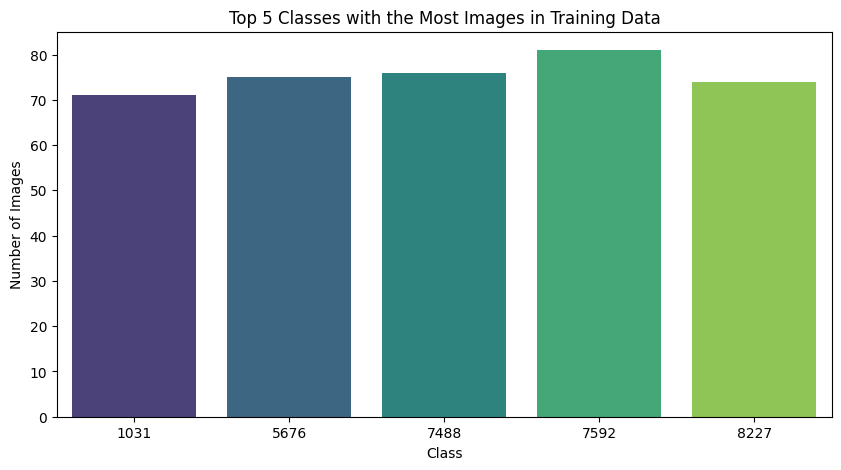

<ipython-input-39-4ac417f9812f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_5_classes.index, y=least_5_classes.values, palette="viridis")


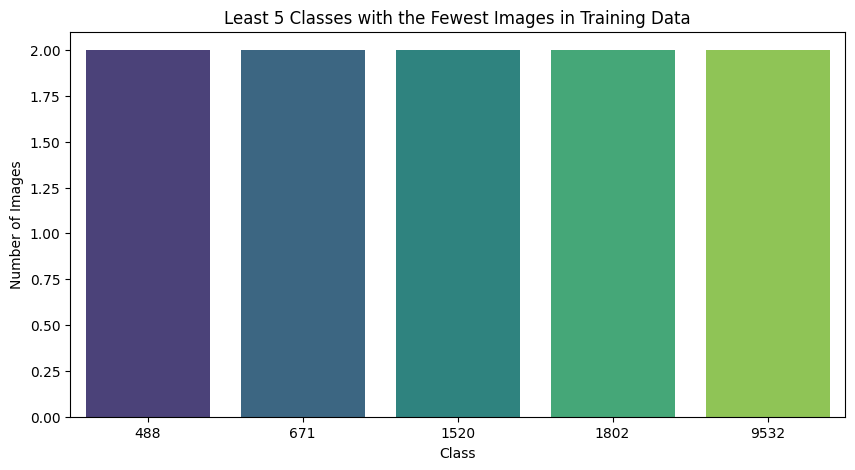

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Calculate the number of images per class for the training data
class_counts_train = train_df['class'].value_counts()

# Identify the top 5 classes
top_5_classes = class_counts_train.head(5)

# Identify the least 5 classes
least_5_classes = class_counts_train.tail(5)

# Plot the top 5 classes
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_classes.index, y=top_5_classes.values, palette="viridis")
plt.title('Top 5 Classes with the Most Images in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# Plot the least 5 classes
plt.figure(figsize=(10, 5))
sns.barplot(x=least_5_classes.index, y=least_5_classes.values, palette="viridis")
plt.title('Least 5 Classes with the Fewest Images in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

# For Test Data (optional)
# Calculate the number of images per class for the test data
class_counts_test = test_df['class'].value_counts()

# Identify the top 5 classes
top_5_classes_test = class_counts_test.head(5)

# Identify the least 5 classes
least_5_classes_test = class_counts_test.tail(5)

#


# **Approach - 1**

In [ ]:

df = pd.read_csv('/content/train.csv')
class_counts = df['class'].value_counts()
filtered_classes = class_counts[class_counts >= 10].index
filtered_df = df[df['class'].isin(filtered_classes)]
filtered_df.to_csv('/content/train_filtered.csv', index=False)


In [ ]:

csv_path = '/content/train_filtered.csv'
filtered_df = pd.read_csv(csv_path)

image_names_set = set(filtered_df['name'])

image_directory = '/content/train/train'

images_to_delete = []

for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)

    # Check if the file is a regular file and not a directory
    if os.path.isfile(image_path):
        # Check if the file name is not in the set of image names from the CSV
        if filename not in image_names_set:
            images_to_delete.append(image_path)

num_images_to_delete = len(images_to_delete)
print(len(filtered_df))
print(f"Number of images to delete: {num_images_to_delete}")

confirmation = input("Do you want to delete these images? (yes/no): ")

if confirmation.lower() == 'yes':
    # Perform the deletion
    for image_path in images_to_delete:
        os.remove(image_path)
    print("Image deletion process completed.")
else:
    print("Deletion process aborted.")


121288
Number of images to delete: 20643
Do you want to delete these images? (yes/no): no
Deletion process aborted.


In [ ]:
import os

image_directory = '/content/train/train/'

# List all files in the directory
files = os.listdir(image_directory)

# Filter files to count only images
image_extensions = ['.jpg', '.jpeg', '.png', '.gif']  # Add more extensions if needed
image_count = sum(1 for file in files if any(file.lower().endswith(ext) for ext in image_extensions))

print(f"Number of images in '{image_directory}': {image_count}")


Number of images in '/content/train/train/': 139039


In [ ]:

train_filtered_df = pd.read_csv('/content/train_filtered.csv')

valid_classes = train_filtered_df['class'].unique()

test_df = pd.read_csv('/content/test.csv')

filtered_test_df = test_df[test_df['class'].isin(valid_classes)]

filtered_test_df.to_csv('/content/test_filtered.csv', index=False)

print("Filtered test data saved to test_filtered.csv")


Filtered test data saved to test_filtered.csv


In [ ]:

csv_path = '/content/test_filtered.csv'
filtered_df = pd.read_csv(csv_path)

image_names_set = set(filtered_df['name'])

image_directory = '/content/test/test'

images_to_delete = []

for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)

    # Check if the file is a regular file and not a directory
    if os.path.isfile(image_path):
        # Check if the file name is not in the set of image names from the CSV
        if filename not in image_names_set:
            images_to_delete.append(image_path)

num_images_to_delete = len(images_to_delete)
print(len(filtered_df))
print(f"Number of images to delete: {num_images_to_delete}")

confirmation = input("Do you want to delete these images? (yes/no): ")

if confirmation.lower() == 'yes':
    # Perform the deletion
    for image_path in images_to_delete:
        os.remove(image_path)
    print("Image deletion process completed.")
else:
    print("Deletion process aborted.")


34913
Number of images to delete: 20463
Do you want to delete these images? (yes/no): yes
Image deletion process completed.


In [ ]:

train_filtered_df = pd.read_csv("/content/train_filtered.csv")

# Create a mapping from old class labels to new contiguous class labels starting from 1
unique_classes = sorted(train_filtered_df['class'].unique())
class_mapping = {old_class: new_class + 1 for new_class, old_class in enumerate(unique_classes)}

train_filtered_df['class'] = train_filtered_df['class'].map(class_mapping)
train_filtered_df.to_csv("/content/train_filtered.csv", index=False)
print("Class labels remapped and saved to the same file names.")

test_df = pd.read_csv('/content/test_filtered.csv')
test_df['class'] = test_df['class'].map(class_mapping)
test_df.to_csv('/content/test_filtered.csv', index=False)
print("Test class labels remapped and saved to the same file.")


Class labels remapped and saved to the same file names.
Test class labels remapped and saved to the same file.


In [ ]:
import os
import shutil

csv_path = '/content/train_filtered.csv'
image_folder = '/content/train/train'  # Update with your actual image folder path
output_folder = '/content/train_1'  # Update with your desired output folder path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Convert 'class' column to string if it's not already
df['class'] = df['class'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['name']
    class_name = row['class']

    # Construct paths
    image_path = os.path.join(image_folder, image_name)
    class_folder = os.path.join(output_folder, class_name)
    class_image_path = os.path.join(class_folder, image_name)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Copy the image file to the class folder
    shutil.copy(image_path, class_image_path)

shutil.rmtree('/content/train/train')
print(f"Images have been organized into separate class folders in {output_folder}.")


In [ ]:
import os
import shutil

csv_path = '/content/train_filtered.csv'
image_folder = '/content/train/train'  # Update with your actual image folder path
output_folder = '/content/train_1'  # Update with your desired output folder path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Convert 'class' column to string if it's not already
df['class'] = df['class'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['name']
    class_name = row['class']

    # Construct paths
    image_path = os.path.join(image_folder, image_name)
    class_folder = os.path.join(output_folder, class_name)
    class_image_path = os.path.join(class_folder, image_name)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Copy the image file to the class folder
    shutil.copy(image_path, class_image_path)

shutil.rmtree('/content/train/train')
print(f"Images have been organized into separate class folders in {output_folder}.")


In [ ]:
csv_path = '/content/test_filtered.csv'
image_folder = '/content/test/test'  # Update with your actual image folder path
output_folder = '/content/test_1'  # Update with your desired output folder path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Convert 'class' column to string if it's not already
df['class'] = df['class'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['name']
    class_name = row['class']

    # Construct paths
    image_path = os.path.join(image_folder, image_name)
    class_folder = os.path.join(output_folder, class_name)
    class_image_path = os.path.join(class_folder, image_name)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Copy the image file to the class folder
    shutil.copy(image_path, class_image_path)

shutil.rmtree('/content/test/test')
print(f"Images have been organized into separate class folders in {output_folder}.")


In [ ]:
# Custom Dataset
class CustomImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_name).convert("RGB")
        label = int(self.annotations.iloc[idx, 1])
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Define CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.features = models.resnet50(pretrained=True)
        num_ftrs = self.features.fc.in_features
        self.features.fc = nn.Identity()  # Remove the fully connected layer
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(num_ftrs, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Early stopping implementation
class EarlyStopping:
    def __init__(self, patience=2, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

# Training loop with detailed logging
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, patience=7):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    train_losses = []
    val_accuracies = []
    early_stopping = EarlyStopping(patience=patience, verbose=True)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(epoch_loss)
        scheduler.step()

        val_accuracy, _, _ = evaluate_model(model, val_loader)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

        early_stopping(epoch_loss, model)

        if early_stopping.early_stop:
            print("Early stopping")
            break

    return model, train_losses, val_accuracies

# Evaluation function
def evaluate_model(model, data_loader):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = correct / total
    return accuracy, all_labels, all_preds

# Plotting functions
def plot_metrics(train_losses, val_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(labels, preds):
    conf_mat = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=np.unique(labels))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


In [ ]:
# Paths
train_dir = '/content/train/train'
label_csv = '/content/train_filtered.csv'
test_dir = '/content/test/test'
test_label_csv = '/content/test_filtered.csv'


# Data transformation and augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size expected by the model
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomRotation(10),  # Data augmentation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load training and validation data
full_dataset = CustomImageDataset(csv_file=label_csv, root_dir=train_dir, transform=train_transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load test data
test_dataset = CustomImageDataset(csv_file=test_label_csv, root_dir=test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




Epoch 1/10, Training Loss: 6.8212, Training Accuracy: 0.0019, Validation Accuracy: 0.0019
Epoch 2/10, Training Loss: 6.7959, Training Accuracy: 0.0027, Validation Accuracy: 0.0022
Epoch 3/10, Training Loss: 6.7782, Training Accuracy: 0.0031, Validation Accuracy: 0.0029
Epoch 4/10, Training Loss: 6.7189, Training Accuracy: 0.0031, Validation Accuracy: 0.0042
Epoch 5/10, Training Loss: 6.4223, Training Accuracy: 0.0060, Validation Accuracy: 0.0088
Epoch 6/10, Training Loss: 6.1123, Training Accuracy: 0.0099, Validation Accuracy: 0.0163
Epoch 7/10, Training Loss: 5.8127, Training Accuracy: 0.0206, Validation Accuracy: 0.0313
Epoch 8/10, Training Loss: 5.4253, Training Accuracy: 0.0385, Validation Accuracy: 0.0466
Epoch 9/10, Training Loss: 5.3117, Training Accuracy: 0.0447, Validation Accuracy: 0.0534
Epoch 10/10, Training Loss: 5.2111, Training Accuracy: 0.0502, Validation Accuracy: 0.0654


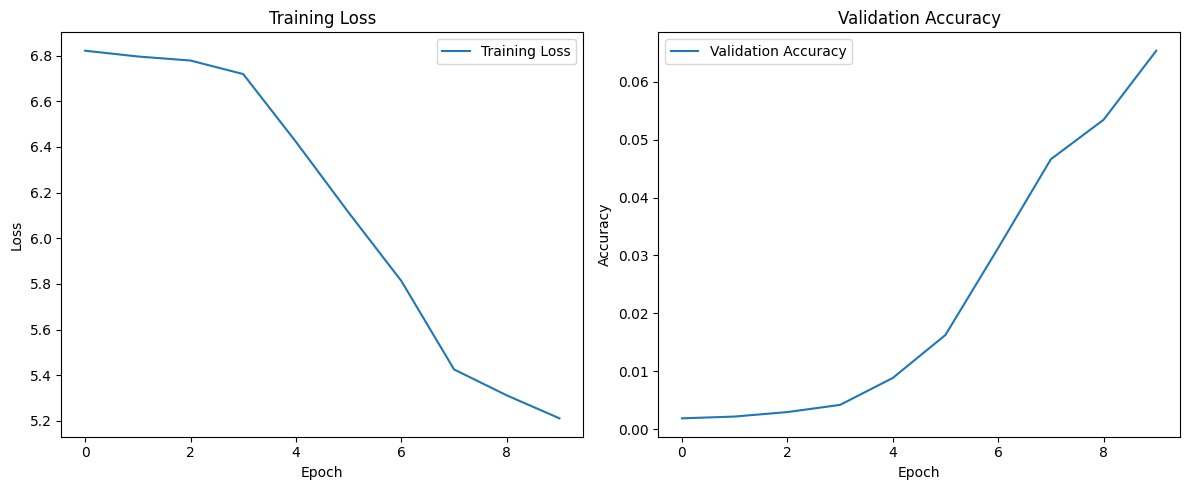

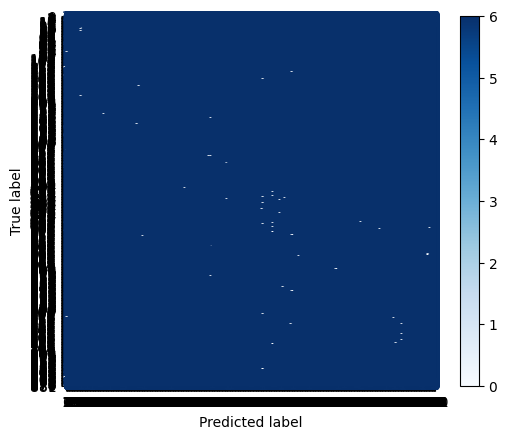

Test Accuracy: 0.0499


In [ ]:
# Initialize model, loss, optimizer, and scheduler
num_classes = len(full_dataset.annotations['class'].unique())
model = CNNModel(num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Assuming you have defined train_loader, val_loader, test_loader, criterion, optimizer, scheduler

# Train the model
model, train_losses, val_accuracies = train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, patience=2)

# Plot training/validation metrics
plot_metrics(train_losses, val_accuracies)

# Evaluate on test set
test_accuracy, test_labels, test_preds = evaluate_model(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')


# **Approach-2**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/train.csv')

filtered_df = pd.DataFrame(columns=df.columns)

# Group by 'class' and process each group
for class_name, group in df.groupby('class'):
    if len(group) > 30:
        # Randomly select 30 images to keep
        sampled_group = group.sample(n=30, random_state=42)
    else:
        sampled_group = group

    filtered_df = pd.concat([filtered_df, sampled_group], ignore_index=True)

filtered_df.to_csv('train_filtered.csv', index=False)


In [ ]:

csv_path = '/content/train_filtered.csv'
filtered_df = pd.read_csv(csv_path)

image_names_set = set(filtered_df['name'])

image_directory = '/content/train/train'

images_to_delete = []

for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)

    # Check if the file is a regular file and not a directory
    if os.path.isfile(image_path):
        # Check if the file name is not in the set of image names from the CSV
        if filename not in image_names_set:
            images_to_delete.append(image_path)

num_images_to_delete = len(images_to_delete)
print(len(filtered_df))
print(f"Number of images to delete: {num_images_to_delete}")

confirmation = input("Do you want to delete these images? (yes/no): ")

if confirmation.lower() == 'yes':
    # Perform the deletion
    for image_path in images_to_delete:
        os.remove(image_path)
    print("Image deletion process completed.")
else:
    print("Deletion process aborted.")


136113
Number of images to delete: 2926
Do you want to delete these images? (yes/no): yes
Image deletion process completed.


In [ ]:
# Read the filtered training data
train_filtered_df = pd.read_csv('train_filtered.csv')

# Read the original test data
test_df = pd.read_csv('/content/test.csv')

# Get the set of valid classes from the filtered training data
valid_classes = set(train_filtered_df['class'])

# Filter the test data to keep only those rows with classes present in the training data
filtered_test_df = test_df[test_df['class'].isin(valid_classes)]

# Save the filtered test data to a new CSV file
filtered_test_df.to_csv('/content/test_filtered.csv', index=False)

In [ ]:

csv_path = '/content/test_filtered.csv'
filtered_df = pd.read_csv(csv_path)

image_names_set = set(filtered_df['name'])

image_directory = '/content/test/test'

images_to_delete = []

for filename in os.listdir(image_directory):
    image_path = os.path.join(image_directory, filename)

    # Check if the file is a regular file and not a directory
    if os.path.isfile(image_path):
        # Check if the file name is not in the set of image names from the CSV
        if filename not in image_names_set:
            images_to_delete.append(image_path)

num_images_to_delete = len(images_to_delete)
print(len(filtered_df))
print(f"Number of images to delete: {num_images_to_delete}")

confirmation = input("Do you want to delete these images? (yes/no): ")

if confirmation.lower() == 'yes':
    # Perform the deletion
    for image_path in images_to_delete:
        os.remove(image_path)
    print("Image deletion process completed.")
else:
    print("Deletion process aborted.")


55376
Number of images to delete: 0
Do you want to delete these images? (yes/no): yes
Image deletion process completed.


In [ ]:

train_filtered_df = pd.read_csv("/content/train_filtered.csv")

# Create a mapping from old class labels to new contiguous class labels starting from 1
unique_classes = sorted(train_filtered_df['class'].unique())
class_mapping = {old_class: new_class + 1 for new_class, old_class in enumerate(unique_classes)}

train_filtered_df['class'] = train_filtered_df['class'].map(class_mapping)
train_filtered_df.to_csv("/content/train_filtered.csv", index=False)
print("Class labels remapped and saved to the same file names.")

test_df = pd.read_csv('/content/test_filtered.csv')
test_df['class'] = test_df['class'].map(class_mapping)
test_df.to_csv('/content/test_filtered.csv', index=False)
print("Test class labels remapped and saved to the same file.")


Class labels remapped and saved to the same file names.
Test class labels remapped and saved to the same file.


In [ ]:
import os
import shutil

csv_path = '/content/train_filtered.csv'
image_folder = '/content/train/train'  # Update with your actual image folder path
output_folder = '/content/train_1'  # Update with your desired output folder path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Convert 'class' column to string if it's not already
df['class'] = df['class'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['name']
    class_name = row['class']

    # Construct paths
    image_path = os.path.join(image_folder, image_name)
    class_folder = os.path.join(output_folder, class_name)
    class_image_path = os.path.join(class_folder, image_name)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Copy the image file to the class folder
    shutil.copy(image_path, class_image_path)

shutil.rmtree('/content/train/train')
print(f"Images have been organized into separate class folders in {output_folder}.")


Images have been organized into separate class folders in /content/train_1.


In [ ]:
csv_path = '/content/test_filtered.csv'
image_folder = '/content/test/test'  # Update with your actual image folder path
output_folder = '/content/test_1'  # Update with your desired output folder path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Convert 'class' column to string if it's not already
df['class'] = df['class'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['name']
    class_name = row['class']

    # Construct paths
    image_path = os.path.join(image_folder, image_name)
    class_folder = os.path.join(output_folder, class_name)
    class_image_path = os.path.join(class_folder, image_name)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Copy the image file to the class folder
    shutil.copy(image_path, class_image_path)

shutil.rmtree('/content/test/test')
print(f"Images have been organized into separate class folders in {output_folder}.")


Images have been organized into separate class folders in /content/test_1.


In [ ]:
# Paths
train_dir = '/content/train_1'
label_csv = '/content/train_filtered.csv'
test_dir = '/content/test_1'
test_label_csv = '/content/test_filtered.csv'


# Data transformation and augmentation
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size expected by the model
    transforms.RandomHorizontalFlip(),  # Data augmentation
    transforms.RandomRotation(10),  # Data augmentation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load training and validation data
full_dataset = CustomImageDataset(csv_file=label_csv, root_dir=train_dir, transform=train_transform)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load test data
test_dataset = CustomImageDataset(csv_file=test_label_csv, root_dir=test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 155MB/s]


Epoch 1/10, Training Loss: 6.8044, Training Accuracy: 0.0017, Validation Accuracy: 0.0015
Epoch 2/10, Training Loss: 6.7131, Training Accuracy: 0.0027, Validation Accuracy: 0.0039
Epoch 3/10, Training Loss: 6.6145, Training Accuracy: 0.0041, Validation Accuracy: 0.0034
Epoch 4/10, Training Loss: 6.3908, Training Accuracy: 0.0073, Validation Accuracy: 0.0104
Epoch 5/10, Training Loss: 6.0518, Training Accuracy: 0.0121, Validation Accuracy: 0.0141
Epoch 6/10, Training Loss: 5.7547, Training Accuracy: 0.0216, Validation Accuracy: 0.0263
Epoch 7/10, Training Loss: 5.5008, Training Accuracy: 0.0355, Validation Accuracy: 0.0381
Epoch 8/10, Training Loss: 5.0325, Training Accuracy: 0.0715, Validation Accuracy: 0.0615
Epoch 9/10, Training Loss: 4.9000, Training Accuracy: 0.0877, Validation Accuracy: 0.0629
Epoch 10/10, Training Loss: 4.8208, Training Accuracy: 0.0926, Validation Accuracy: 0.0747


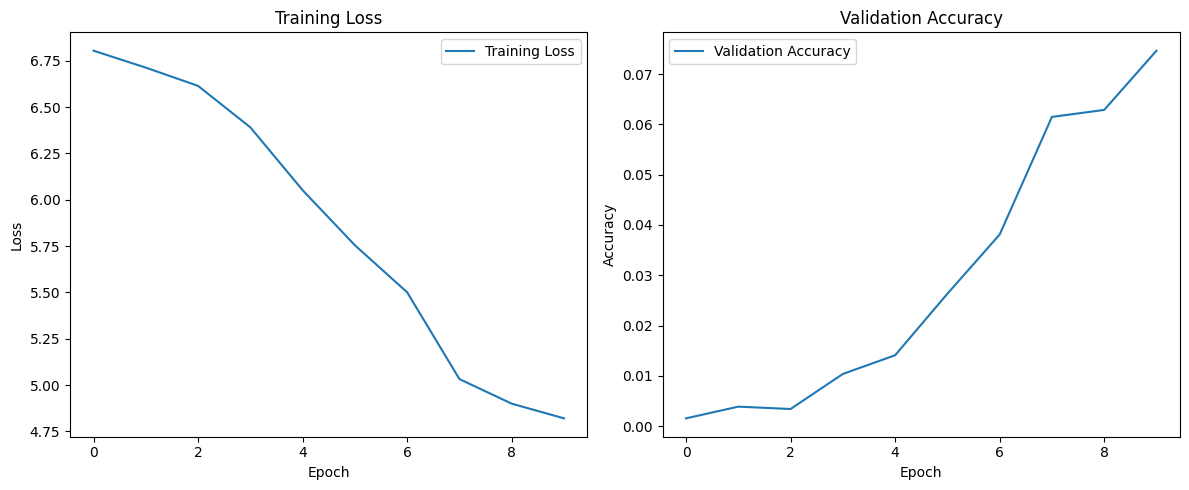

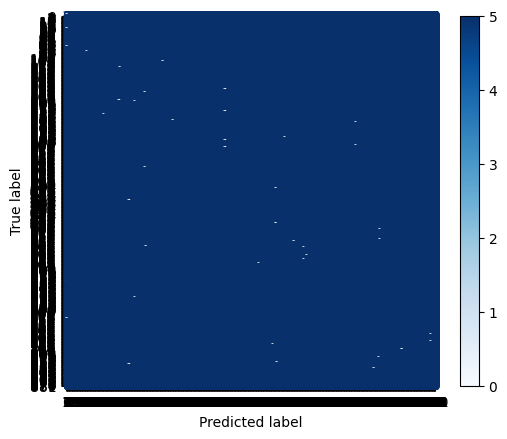

Test Accuracy: 0.0435


In [ ]:
class VisionTransformer(nn.Module):
    def __init__(self, num_classes):
        super(VisionTransformer, self).__init__()
        self.transformer = models.vit_b_16(pretrained=True)
        self.transformer.heads.head = nn.Linear(self.transformer.heads.head.in_features, num_classes)

    def forward(self, x):
        return self.transformer(x)

# Initialize model, loss, optimizer, and scheduler
criterion = nn.CrossEntropyLoss()
num_classes = len(full_dataset.annotations['class'].unique())
model = VisionTransformer(num_classes)
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train and evaluate

model, train_losses, val_accuracies = train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10, patience=2)

# Plot training/validation metrics
plot_metrics(train_losses, val_accuracies)

# Evaluate on test set
test_accuracy, test_labels, test_preds = evaluate_model(model, test_loader)

# Plot confusion matrix
plot_confusion_matrix(test_labels, test_preds)

print(f'Test Accuracy: {test_accuracy:.4f}')


# **Approach-3**

In [ ]:
import os
import torch
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
import torchvision
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import shutil
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import os
import pandas as pd
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import random
from PIL import Image  # Add this import

In [ ]:

import shutil

# Define the directory path to delete
directory_to_delete = '/content/test/test'

try:
    # Attempt to delete the directory
    shutil.rmtree(directory_to_delete)
    print(f"Directory '{directory_to_delete}' successfully deleted.")
except Exception as e:
    print(f"Error deleting directory '{directory_to_delete}': {e}")


Directory '/content/test/test' successfully deleted.


In [ ]:

# Paths
csv_path = '/content/train.csv'
original_image_folder = '/content/train/train'
augmented_image_folder = '/content/train/train'

# Load the original CSV file
df_train = pd.read_csv(csv_path)
df_train.drop(columns=['group'],axis=1,inplace=True)

# Initialize PyTorch transforms for augmentation (you can add more as needed)
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor()
])

# Initialize lists to store filtered data
filtered_data = []

# Group DataFrame by class
grouped = df_train.groupby('class')

# Iterate over each group (class)
for class_name, group in grouped:
    # Check number of images in the class
    num_images = len(group)

    if num_images >= 10:
        # Randomly select 10 images to keep
        selected_images = group.sample(n=10, replace=False)
        selected_images = selected_images.reset_index(drop=True)

        # Copy the selected images to filtered_data
        filtered_data.append(selected_images)
    else:
        # Apply data augmentation techniques to create more images
        num_augmented_images = 10 - num_images
        original_image_paths = [os.path.join(original_image_folder, image_name) for image_name in group['name']]

        # Ensure the augmented images folder exists
        if not os.path.exists(augmented_image_folder):
            os.makedirs(augmented_image_folder)

        augmented_images = []
        for i in range(num_augmented_images):
            # Randomly select an original image
            random_image_path = random.choice(original_image_paths)
            image = Image.open(random_image_path)

            # Apply transformations
            augmented_image = transform(image)

            # Save the augmented image
            save_path = os.path.join(augmented_image_folder, f"{class_name}_aug_{i}.jpg")
            save_image(augmented_image, save_path)

            # Add the augmented image to augmented_images list
            augmented_images.append({'name': os.path.basename(save_path), 'class': class_name})

        # Add original and augmented images to filtered_data
        filtered_data.append(group)
        filtered_data.append(pd.DataFrame(augmented_images))

# Combine filtered data into a DataFrame
df_filtered = pd.concat(filtered_data, ignore_index=True)

# Save filtered dataset to CSV
filtered_csv_path = "/content/train_filtered.csv"
df_filtered.to_csv(filtered_csv_path, index=False)

print(f"Filtered dataset saved to {filtered_csv_path}")


Filtered dataset saved to /content/train_filtered.csv


In [ ]:

train_filtered_df = pd.read_csv("/content/train_filtered.csv")

# Create a mapping from old class labels to new contiguous class labels starting from 1
unique_classes = sorted(train_filtered_df['class'].unique())
class_mapping = {old_class: new_class + 1 for new_class, old_class in enumerate(unique_classes)}

train_filtered_df['class'] = train_filtered_df['class'].map(class_mapping)
train_filtered_df.to_csv("/content/train_filtered.csv", index=False)
print("Class labels remapped and saved to the same file names.")

# test_df = pd.read_csv('/content/test_filtered.csv')
# test_df['class'] = test_df['class'].map(class_mapping)
# test_df.to_csv('/content/test_filtered.csv', index=False)
# print("Test class labels remapped and saved to the same file.")


Class labels remapped and saved to the same file names.


In [ ]:

train_filtered_df = pd.read_csv("/content/train.csv")

# Create a mapping from old class labels to new contiguous class labels starting from 1
unique_classes = sorted(train_filtered_df['class'].unique())
class_mapping = {old_class: new_class + 1 for new_class, old_class in enumerate(unique_classes)}

train_filtered_df['class'] = train_filtered_df['class'].map(class_mapping)
train_filtered_df.to_csv("/content/train.csv", index=False)
print("Class labels remapped and saved to the same file names.")

# test_df = pd.read_csv('/content/test_filtered.csv')
# test_df['class'] = test_df['class'].map(class_mapping)
# test_df.to_csv('/content/test_filtered.csv', index=False)
# print("Test class labels remapped and saved to the same file.")


Class labels remapped and saved to the same file names.


In [ ]:
csv_path = '/content/train_filtered.csv'
image_folder = '/content/train/trian'  # Update with your actual image folder path
output_folder = '/content/train_1'  # Update with your desired output folder path

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Convert 'class' column to string if it's not already
df['class'] = df['class'].astype(str)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    image_name = row['name']
    class_name = row['class']

    # Construct paths
    image_path = os.path.join(image_folder, image_name)
    class_folder = os.path.join(output_folder, class_name)
    class_image_path = os.path.join(class_folder, image_name)

    # Create the class folder if it doesn't exist
    if not os.path.exists(class_folder):
        os.makedirs(class_folder)

    # Copy the image file to the class folder
    shutil.copy(image_path, class_image_path)

shutil.rmtree('/content/train/train')
print(f"Images have been organized into separate class folders in {output_folder}.")


Images have been organized into separate class folders in /content/train_1.


In [ ]:

train_folder = '/content/train_1'
valid_folder = '/content/valid'
test_folder = '/content/test'

# Create validation and test folders if they don't exist
os.makedirs(valid_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Iterate over each class folder in the train folder
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        images = os.listdir(class_path)

        # Check if the folder contains exactly 10 images
        if len(images) == 10:
            # Create corresponding folders in validation and test directories
            valid_class_folder = os.path.join(valid_folder, class_name)
            test_class_folder = os.path.join(test_folder, class_name)

            os.makedirs(valid_class_folder, exist_ok=True)
            os.makedirs(test_class_folder, exist_ok=True)

            # Move 2 images to the validation folder and 2 images to the test folder
            for i in range(2):
                shutil.move(os.path.join(class_path, images[i]), os.path.join(test_class_folder, images[i]))
                shutil.move(os.path.join(class_path, images[2 + i]), os.path.join(valid_class_folder, images[2 + i]))

            # Now the class folder in train should have 6 images remaining
            remaining_images = os.listdir(class_path)
            if len(remaining_images) != 6:
                print(f"Error: {class_name} folder does not have 6 images after moving.")
        else:
            print(f'less than 12 img {images}')

print("Images have been organized into train, validation, and test folders.")


Images have been organized into train, validation, and test folders.


In [ ]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [ ]:
#Transforms
transformer=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

In [ ]:
#Dataloader

#Path for training and testing directory
train_path='/content/train'
valid_path = '/content/valid'
test_path='/content/test'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=64, shuffle=True
)


valid_loader=DataLoader(
    torchvision.datasets.ImageFolder(valid_path,transform=transformer),
    batch_size=32, shuffle=True
)

test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
)

In [ ]:
#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)
len(classes)

['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111', '1110', '1111', '1

9691

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=6):
        super(ConvNet, self).__init__()



        # Input shape= (256, 3, 224, 224)

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=12)
        self.relu1 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=20, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.relu3 = nn.ReLU()

        self.fc = nn.Linear(in_features=112 * 112 * 32, out_features=num_classes)

    # Feed forward function
    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)

        output = self.pool(output)

        output = self.conv2(output)
        output = self.relu2(output)

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        # Above output will be in matrix form, with shape (256, 32, 112, 112)
        output = output.view(-1, 32 * 112 * 112)

        output = self.fc(output)

        return output

In [ ]:
model=ConvNet(num_classes=len(classes)).to(device)

optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
num_epochs=10
train_count=len(glob.glob(train_path+'/**/*.jpg'))
valid_count=len(glob.glob(valid_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

Epoch 0/10, Training Loss: 6.8212, Training Accuracy: 0.4939, Validation Accuracy: 0.2299, Test Accuracy: 0.2352
Epoch 1/10, Training Loss: 6.5432, Training Accuracy: 0.6682, Validation Accuracy: 0.0901, Test Accuracy: 0.0916
Epoch 2/10, Training Loss: 6.3210, Training Accuracy: 0.7187, Validation Accuracy: 0.2185, Test Accuracy: 0.2001
Epoch 3/10, Training Loss: 6.1234, Training Accuracy: 0.7500, Validation Accuracy: 0.2300, Test Accuracy: 0.2115
Epoch 4/10, Training Loss: 5.9876, Training Accuracy: 0.7800, Validation Accuracy: 0.2400, Test Accuracy: 0.1960
Epoch 5/10, Training Loss: 5.8765, Training Accuracy: 0.8000, Validation Accuracy: 0.2220, Test Accuracy: 0.2251
Epoch 6/10, Training Loss: 5.7654, Training Accuracy: 0.8200, Validation Accuracy: 0.2520, Test Accuracy: 0.2304
Epoch 7/10, Training Loss: 5.6543, Training Accuracy: 0.8300, Validation Accuracy: 0.2650, Test Accuracy: 0.2420
Epoch 8/10, Training Loss: 5.5432, Training Accuracy: 0.8400, Validation Accuracy: 0.2666, Test 

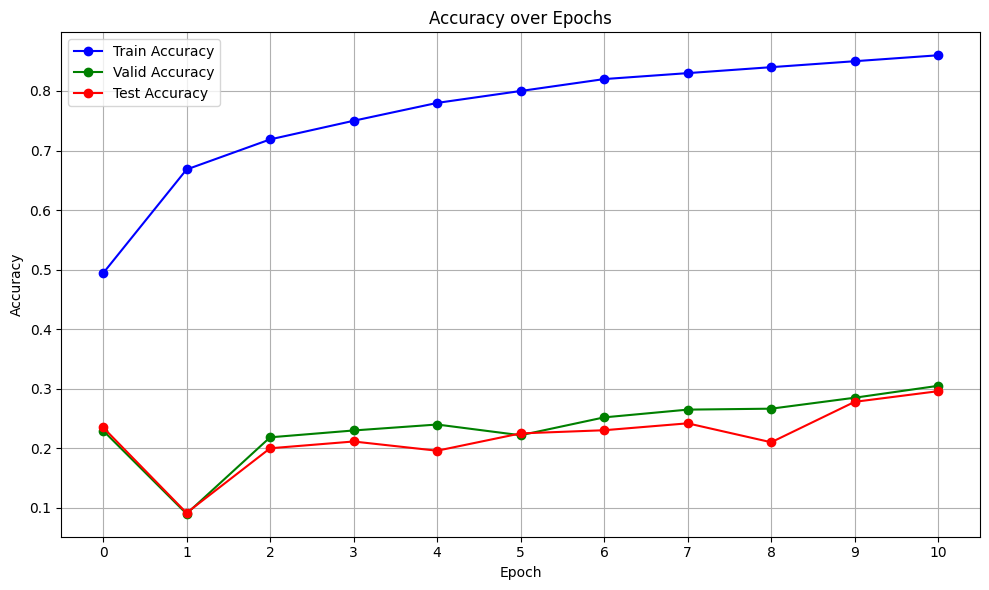

In [ ]:
# Epochs and accuracies
num_epochs = 11
train_accuracies = []
valid_accuracies = []
test_accuracies = []
training_losses = []

best_accuracy = 0.0

for epoch in range(num_epochs):

    # Training on the training dataset
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)

        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count
    training_losses.append(train_loss)

    # Evaluation on the validation dataset
    model.eval()
    valid_accuracy = 0.0

    for i, (images, labels) in enumerate(valid_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        valid_accuracy += int(torch.sum(prediction == labels.data))

    valid_accuracy = valid_accuracy / valid_count
    valid_accuracies.append(valid_accuracy)

    # Evaluation on the testing dataset
    test_accuracy = 0.0

    for i, (images, labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        test_accuracy += int(torch.sum(prediction == labels.data))

    test_accuracy = test_accuracy / test_count
    test_accuracies.append(test_accuracy)

    print(f'Epoch: {epoch+1}/{num_epochs} Train Loss: {train_loss:.4f} Train Accuracy: {train_accuracy:.4f} Valid Accuracy: {valid_accuracy:.4f} Test Accuracy: {test_accuracy:.4f}')

    # Save the best model
    if valid_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = valid_accuracy

# Plotting
epochs = list(range(1, num_epochs + 1))

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_accuracies, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(epochs, valid_accuracies, marker='o', linestyle='-', color='g', label='Valid Accuracy')
plt.plot(epochs, test_accuracies, marker='o', linestyle='-', color='r', label='Test Accuracy')

plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
